<a href="https://colab.research.google.com/github/marcelorandolfo/medium/blob/master/teste_de_hipoteses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Códigos utilizados no artigo: "O que realmente um teste de hipóteses quer nos dizer?"

In [0]:
# importando pacotes
from math import sqrt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns

sns.set_style('white')

### Simulação das distribuições 

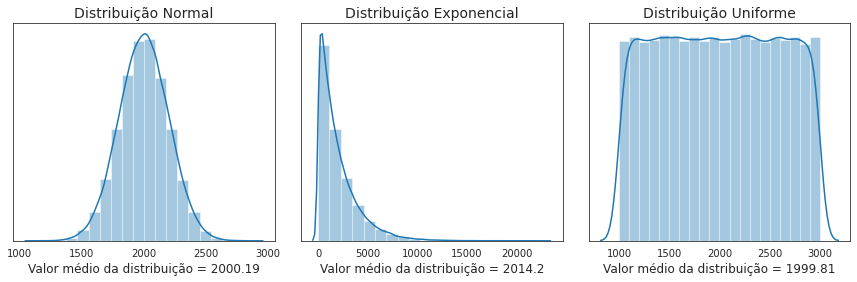

In [2]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
fig.subplots_adjust(wspace=0.1)

np.random.seed(42)

pop_normal = sct.norm.rvs(loc = 2000, scale = 200,  size=100000)
pop_exp = sct.expon.rvs(scale = 2000, size=100000)
pop_uniform = sct.uniform.rvs(loc = 1000, scale = 2000, size=100000)


sns.distplot(pop_normal, bins=20, hist_kws={"density": True}, ax=ax[0])
ax[0].set_title('Distribuição Normal', fontsize=14)
ax[0].set_xlabel('Valor médio da distribuição = {}'.format(pop_normal.mean().round(2)), fontsize = 12)
ax[0].set_yticks([])
sns.distplot(pop_exp,  bins=20, hist_kws={"density": True}, ax=ax[1])
ax[1].set_title('Distribuição Exponencial', fontsize=14)
ax[1].set_xlabel('Valor médio da distribuição = {}'.format(pop_exp.mean().round(2)), fontsize = 12)
ax[1].set_yticks([])
sns.distplot(pop_uniform, bins=20, hist_kws={"density": True}, ax=ax[2])
ax[2].set_title('Distribuição Uniforme', fontsize=14)
ax[2].set_xlabel('Valor médio da distribuição = {}'.format(pop_uniform.mean().round(2)), fontsize = 12)
ax[2].set_yticks([])

fig.show();

### Coletando as amostras das distribuições e calculando suas médias

In [0]:
# função para coleta das amostras aleatórias das distribuições
def get_sample(df, col_name, n, seed=42):    
    np.random.seed(seed)    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)    
    return df.loc[random_idx, col_name]

In [4]:
# organizando médias amostrais
pops = pd.DataFrame({ 'normal' : pop_normal,
                     'exponencial' : pop_exp,
                     'uniforme' : pop_uniform})

dists = ['normal','exponencial','uniforme']
medias_df = pd.DataFrame({'numero_medias' : range(1000)})
tamanho_amostras = [10, 30, 50]
reps = medias_df.shape[0]

for dist in dists:
  for n in tamanho_amostras:
    medias = []
    for rep in range(reps):
      value = get_sample(pops, dist, n = n, seed = 42 + rep).mean()
      medias.append(value)
    medias_df['n:{}_d:{}'.format(n,dist)] = medias

medias_df.head()

,numero_medias,n:10_d:normal,n:30_d:normal,n:50_d:normal,n:10_d:exponencial,n:30_d:exponencial,n:50_d:exponencial,n:10_d:uniforme,n:30_d:uniforme,n:50_d:uniforme
0,0,1990.689476,2018.061908,2040.223267,1227.147407,1665.481619,1725.265927,1765.369024,1982.372997,1913.869843
1,1,1957.887763,2015.981272,2002.365734,2157.358439,1836.735097,1861.905175,2244.593047,2110.372623,2026.367874
2,2,1950.009528,2016.130072,2028.588700,1454.218955,1968.465070,1757.686551,2137.121654,1927.079188,2024.255398
3,3,1990.666804,2007.057556,2025.396368,2084.832704,1855.654361,2010.946781,2068.045762,2130.818016,2074.047095
4,4,1953.585508,2023.306712,2000.381697,2051.931223,2099.545221,2047.193686,2326.752515,2097.872047,2061.691509


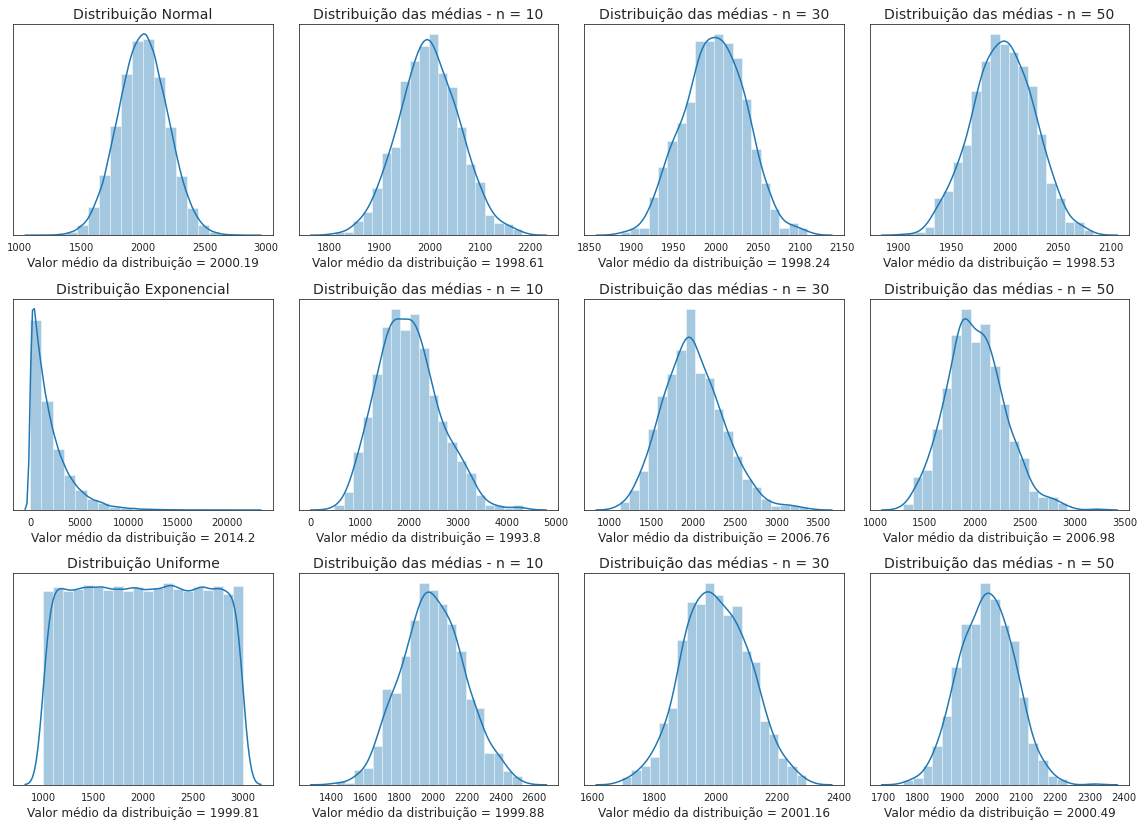

In [5]:
# plotando os gráficos das distribuições populacionais e das médias amostrais
fig, ax = plt.subplots(3, 4, figsize=(20, 14))
fig.subplots_adjust(hspace=0.3, wspace=0.1)

sns.distplot(pops['normal'], bins=20, hist_kws={"density": True}, ax=ax[0,0])
ax[0,0].set_title('Distribuição Normal', fontsize=14)
ax[0,0].set_xlabel('Valor médio da distribuição = {}'.format(round(pops['normal'].mean(),2)), fontsize = 12)
ax[0,0].set_yticks([])

sns.distplot(medias_df['n:10_d:normal'], bins=20, hist_kws={"density": True}, ax=ax[0,1])
ax[0,1].set_title('Distribuição das médias - n = 10', fontsize=14)
ax[0,1].set_xlabel('Valor médio da distribuição = {}'.format(round(medias_df['n:10_d:normal'].mean(),2)), fontsize = 12)
ax[0,1].set_yticks([])

sns.distplot(medias_df['n:30_d:normal'], bins=20, hist_kws={"density": True}, ax=ax[0,2])
ax[0,2].set_title('Distribuição das médias - n = 30', fontsize=14)
ax[0,2].set_xlabel('Valor médio da distribuição = {}'.format(round(medias_df['n:30_d:normal'].mean(),2)), fontsize = 12)
ax[0,2].set_yticks([])

sns.distplot(medias_df['n:50_d:normal'], bins=20, hist_kws={"density": True}, ax=ax[0,3])
ax[0,3].set_title('Distribuição das médias - n = 50', fontsize=14)
ax[0,3].set_xlabel('Valor médio da distribuição = {}'.format(round(medias_df['n:50_d:normal'].mean(),2)), fontsize = 12)
ax[0,3].set_yticks([])


sns.distplot(pops['exponencial'], bins=20, hist_kws={"density": True}, ax=ax[1,0])
ax[1,0].set_title('Distribuição Exponencial', fontsize=14)
ax[1,0].set_xlabel('Valor médio da distribuição = {}'.format(round(pops['exponencial'].mean(),2)), fontsize = 12)
ax[1,0].set_yticks([])

sns.distplot(medias_df['n:10_d:exponencial'], bins=20, hist_kws={"density": True}, ax=ax[1,1])
ax[1,1].set_title('Distribuição das médias - n = 10', fontsize=14)
ax[1,1].set_xlabel('Valor médio da distribuição = {}'.format(round(medias_df['n:10_d:exponencial'].mean(),2)), fontsize = 12)
ax[1,1].set_yticks([])

sns.distplot(medias_df['n:30_d:exponencial'], bins=20, hist_kws={"density": True}, ax=ax[1,2])
ax[1,2].set_title('Distribuição das médias - n = 30', fontsize=14)
ax[1,2].set_xlabel('Valor médio da distribuição = {}'.format(round(medias_df['n:30_d:exponencial'].mean(),2)), fontsize = 12)
ax[1,2].set_yticks([])

sns.distplot(medias_df['n:50_d:exponencial'], bins=20, hist_kws={"density": True}, ax=ax[1,3])
ax[1,3].set_title('Distribuição das médias - n = 50', fontsize=14)
ax[1,3].set_xlabel('Valor médio da distribuição = {}'.format(round(medias_df['n:50_d:exponencial'].mean(),2)), fontsize = 12)
ax[1,3].set_yticks([])

sns.distplot(pops['uniforme'], bins=20, hist_kws={"density": True}, ax=ax[2,0])
ax[2,0].set_title('Distribuição Uniforme', fontsize=14)
ax[2,0].set_xlabel('Valor médio da distribuição = {}'.format(round(pops['uniforme'].mean(),2)), fontsize = 12)
ax[2,0].set_yticks([])

sns.distplot(medias_df['n:10_d:uniforme'], bins=20, hist_kws={"density": True}, ax=ax[2,1])
ax[2,1].set_title('Distribuição das médias - n = 10', fontsize=14)
ax[2,1].set_xlabel('Valor médio da distribuição = {}'.format(round(medias_df['n:10_d:uniforme'].mean(),2)), fontsize = 12)
ax[2,1].set_yticks([])

sns.distplot(medias_df['n:30_d:uniforme'], bins=20, hist_kws={"density": True}, ax=ax[2,2])
ax[2,2].set_title('Distribuição das médias - n = 30', fontsize=14)
ax[2,2].set_xlabel('Valor médio da distribuição = {}'.format(round(medias_df['n:30_d:uniforme'].mean(),2)), fontsize = 12)
ax[2,2].set_yticks([])

sns.distplot(medias_df['n:50_d:uniforme'], bins=20, hist_kws={"density": True}, ax=ax[2,3])
ax[2,3].set_title('Distribuição das médias - n = 50', fontsize=14)
ax[2,3].set_xlabel('Valor médio da distribuição = {}'.format(round(medias_df['n:50_d:uniforme'].mean(),2)), fontsize = 12)
ax[2,3].set_yticks([])

fig.show();

### Tratando a base de dados do Data Hackers

* Objetivo: obter os salários dos profissionais que são Cientistas de Dados.

In [6]:
# link dos dados no meu dropbox
link = 'https://www.dropbox.com/s/4p982epvk1ib8mz/datahackers-survey-2019-anonymous-responses.csv?dl=1'

# importando a base de dados
df = pd.read_csv(link)

# observando os cinco primeiros valores
df.head()

,"('P0', 'id')","('P1', 'age')","('P2', 'gender')","('P3', 'living_in_brasil')","('P5', 'living_state')","('P6', 'born_or_graduated')","('P8', 'degreee_level')","('P10', 'job_situation')","('P12', 'workers_number')","('P13', 'manager')","('P16', 'salary_range')","('P17', 'time_experience_data_science')","('P18', 'time_experience_before')","('P19', 'is_data_science_professional')","('P20', 'linear_regression')","('P20', 'logistic_regression')","('P20', 'glms')","('P20', 'decision_tree')","('P20', 'random_forest')","('P20', 'neural_networks')","('P20', 'bayesian_inference')","('P20', 'ensemble')","('P20', 'svms')","('P20', 'cnns')","('P20', 'rnns')","('P20', 'hmms')","('P20', 'gans')","('P20', 'markov_chains')","('P20', 'nlp')","('P20', 'gradient_boosted_machines')","('P20', 'cluster_analysis')","('P20', 'survival_analysis')","('P20', 'longitudinal_data_analysis')","('P20', 'joint analysis')","('P20', 'no_listed_methods')","('P21', 'sql_')","('P21', 'r')","('P21', 'python')","('P21', 'c_c++_c#')","('P21', 'dotnet')",...,"('P30', 'microsoft_azure')","('P30', 'do_not_know')","('P30', 'other')","('P31', 'data_hackers_blog')","('P31', 'data_hackers_podcast')","('P31', 'weekly_newsletter')","('P31', 'slack_channel')","('P31', 'data_hackers_bootcamp')","('P31', 'do_not_know_data_hackers')","('P32', 'prefered_data_hackers_initiative')","('P33', 'telegram_groups')","('P33', 'whatsapp_groups')","('P33', 'youtube_channels')","('P33', 'other_brasilian_blogs')","('P33', 'other_slack_channels')","('P33', 'twitter')","('P33', 'abroad_blogs')","('P33', 'abroad_podcasts')","('P33', 'meetups_and_events')","('P33', 'only_data_hackers')","('P33', 'other')","('P34', 'udacity')","('P34', 'coursera')","('P34', 'udemy')","('P34', 'height')","('P34', 'edx')","('P34', 'data_camp')","('P34', 'data_quest')","('P34', 'kaggle_learn')","('P34', 'online_courses')","('P34', 'other')","('P35', 'data_science_plataforms_preference')","('P35', 'other')","('P36', 'draw_participation')","('D1', 'living_macroregion')","('D2', 'origin_macroregion')","('D3', 'anonymized_degree_area')","('D4', 'anonymized_market_sector')","('D5', 'anonymized_manager_level')","('D6', 'anonymized_role')"
0,v9otv8j9wdvjrv9otvwnn9owhzq54ktv,37.0,Masculino,1,Minas Gerais (MG),1.0,Estudante de Graduação,Empregado (CTL),de 1 a 5,0.0,de R$ 1.001/mês a R$ 2.000/mês,Não tenho experiência na área de dados,Não tive experiência na área de TI/Engenharia ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Ainda não conhecia o Data Hackers,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,Nunca fiz cursos online,NaN,1.0,Região Sudeste,NaN,Computação / Engenharia de Software / Sistemas...,Outras,NaN,Outras
1,875ul998t0hqcv0871uptwf3oswcfv35,24.0,Feminino,1,São Paulo (SP),1.0,Estudante de Graduação,Empregado (CTL),Acima de 3000,0.0,de R$ 2.001/mês a R$ 3000/mês,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,Ainda não conhecia o Data Hackers,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,NaN,Data Science Academy,0.0,Região Sudeste,NaN,Computação / Engenharia de Software / Sistemas...,Educação,NaN,Data Analyst/Analista de Dados
2,puscuk079vw1pusbb900pzw2xvpxtgdk,26.0,Masculino,1,São Paulo (SP),1.0,Graduação/Bacharelado,Empregado (CTL),Acima de 3000,0.0,de R$ 4.001/mês a R$ 6.000/mês,de 1 a 2 anos,de 6 a 10 anos,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,Newsletter Semanal,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,Udemy,NaN,1.0,Região Sudeste,NaN,Outras Engenharias,Indústria (Manufatura),NaN,Outras
3,rmel8ewqpbffp2mnfbzermel8eqincov,21.0,Masculino,1,São Paulo (SP),0.0,Estudante de Graduação,Estagiário,de 11 a 50,0.0,de R$ 1.001/mês a R$ 2.000/mês,Menos de 1 ano,de 2 a 3 anos,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,Ainda não conhecia o Data Hackers,0,1,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,Alura,NaN,1.0,Região Sudeste,Região Sudeste,

In [7]:
# obtendo a quantidade dos valores ausentes da variável alvo - salary_range
df["('P16', 'salary_range')"].isna().sum()

238

In [0]:
# excluindo NA das variáveis alvo - salary_range
df.dropna(axis = 0, subset = ["('P16', 'salary_range')"], inplace = True)

In [9]:
# valores unicos da variável alvo - salary_range
df["('P16', 'salary_range')"].unique()

array(['de R$ 1.001/mês a R$ 2.000/mês', 'de R$ 2.001/mês a R$ 3000/mês',
       'de R$ 4.001/mês a R$ 6.000/mês', 'de R$ 6.001/mês a R$ 8.000/mês',
       'de R$ 3.001/mês a R$ 4.000/mês',
       'de R$ 8.001/mês a R$ 12.000/mês',
       'de R$ 12.001/mês a R$ 16.000/mês', 'Menos de R$ 1.000/mês',
       'de R$ 16.001/mês a R$ 20.000/mês',
       'de R$ 20.001/mês a R$ 25.000/mês', 'Acima de R$ 25.001/mês'],
      dtype=object)

* A variável alvo é do tipo `object`, e para os cálculos nos testes de hipóteses ela deve ser uma variável numérica. Então será criada uma nova variável numérica de salários.
* Nos valores para o salário que são um intervalo, será o valor médio do intervalo.
* Para o valor `Menos de R$ 1.000/mês` será usado o valor 500 como referência.
* Para o valor `Acima de R$ 25.001/mês` será usado o valor 30000 como referência.

In [10]:
# criando uma nova coluna com o valor médio do range de salários
df['salario'] = df["('P16', 'salary_range')"].map({'Menos de R$ 1.000/mês': 500,
                                                         'de R$ 1.001/mês a R$ 2.000/mês': 1500, 
                                                         'de R$ 2.001/mês a R$ 3000/mês': 2500,
                                                         'de R$ 3.001/mês a R$ 4.000/mês': 3500,
                                                         'de R$ 4.001/mês a R$ 6.000/mês': 5000,
                                                         'de R$ 6.001/mês a R$ 8.000/mês': 7000,
                                                         'de R$ 8.001/mês a R$ 12.000/mês': 10000,
                                                         'de R$ 12.001/mês a R$ 16.000/mês': 14000,
                                                         'de R$ 16.001/mês a R$ 20.000/mês': 18000,
                                                         'de R$ 20.001/mês a R$ 25.000/mês': 22500,
                                                         'Acima de R$ 25.001/mês': 30000})

# comparando os valores de salário que são objeto e que são numéricos
df[["('P16', 'salary_range')", "salario"]].head()

,"('P16', 'salary_range')",salario
0,de R$ 1.001/mês a R$ 2.000/mês,1500
1,de R$ 2.001/mês a R$ 3000/mês,2500
2,de R$ 4.001/mês a R$ 6.000/mês,5000
3,de R$ 1.001/mês a R$ 2.000/mês,1500
4,de R$ 6.001/mês a R$ 8.000/mês,7000


* Como o objetivo é obter os salários dos cientistas de dados, serão mantidos na amostra somente as observações com valor `1` para a coluna `('P19', 'is_data_science_professional')`.

In [11]:
# mantendo na amostra somente os profissionais que trabalham como cientistas de dados
df = df[df["('P19', 'is_data_science_professional')"] == 1]

# observando os cinco primeiros valores da variável alvo para cientistas de dados
df[["salario","('P19', 'is_data_science_professional')"]].head()

,salario,"('P19', 'is_data_science_professional')"
1,2500,1
2,5000,1
3,1500,1
4,7000,1
6,7000,1


In [12]:
# obtendo as estatísticas da variável alvo
df_describe = df['salario'].describe().round(2).reset_index()
df_describe.columns = ['Estatística','Valor']
df_describe

,Estatística,Valor
0,count,795.00
1,mean,6986.16
2,std,5062.87
3,min,500.00
4,25%,3500.00
5,50%,5000.00
6,75%,10000.00
7,max,30000.00


### Testes de hipóteses

In [13]:
# teste de hipótese para a variável alvo. H0: 19900
stat, p = sct.ttest_1samp(df['salario'], popmean=19900)
print('Estatística de teste: {}'.format(stat.round(2)))
print('p-valor: {}'.format(p.round(2)))

Estatística de teste: -71.92
p-valor: 0.0


In [14]:
# teste de hipótese para a variável alvo - z-score. H0: 19900
from statsmodels.stats.weightstats import ztest
stat_, p = ztest(df['salario'], value=19900)
print('Estatística de teste: {}'.format(stat.round(2)))
print('p-valor: {}'.format(p.round(2)))

Estatística de teste: -71.92
p-valor: 0.0


In [15]:
# teste de hipótese para a variável alvo - z-score. H0: 6750
stat, p = sct.ttest_1samp(df['salario'], popmean=6750)
print('Estatística de teste: {}'.format(stat.round(2)))
print('p-valor: {}'.format(p.round(2)))

Estatística de teste: 1.32
p-valor: 0.19
